## Preparing Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

## Importing Algorithms

In [ ]:
import sys
sys.path.append(r"..\Untitled Folder\Algorithms")

# Logistic Regression
from logistic_regression import (
    train_logistic_regression,
    predict_logistic_regression,
    train_logistic_regression_ovr,
    predict_logistic_regression_ovr
)

# Decision Tree
from decision_tree import (
    build_tree,
    predict_tree,
    print_tree
)

# KNN
from knn import predict_knn

# Naive Bayes
from naive_bayes import (
    train_naive_bayes,
    predict_naive_bayes
)

# Perceptron
from perceptron import (
    train_perceptron,
    predict_perceptron
)

## Iris Data

In [ ]:
# Load dataset
iris = load_iris()
X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Reduce to 2D for visualization
pca = PCA(n_components=2)
X_train_2d = pca.fit_transform(X_train)
X_test_2d = pca.transform(X_test)

In [ ]:
def plot_decision_boundary(predict_func, X, y, title="Decision Boundary"):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                         np.linspace(y_min, y_max, 200))
    grid = np.c_[xx.ravel(), yy.ravel()]
    Z = predict_func(grid).reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.coolwarm)
    plt.title(title)
    plt.show()

### Logistic Regression

In [ ]:
w_list, b_list, classes = train_logistic_regression_ovr(X_train, y_train, lr=0.1, epochs=3000)
y_pred_lr = predict_logistic_regression_ovr(X_test, w_list, b_list, classes)

print("Logistic Regression Accuracy:", np.mean(y_pred_lr == y_test))

Logistic Regression Accuracy: 1.0


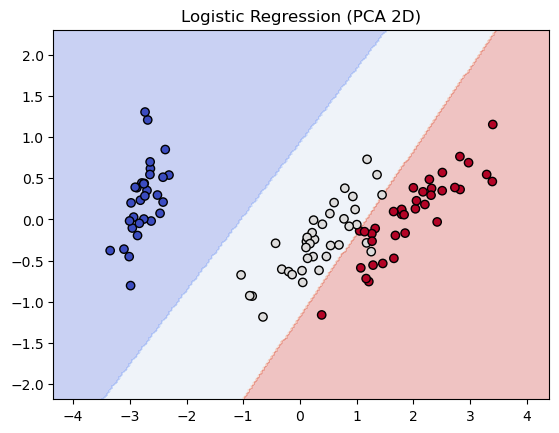

In [ ]:
def predict_lr_grid(X_grid):
    return predict_logistic_regression_ovr(pca.inverse_transform(X_grid), w_list, b_list, classes)

plot_decision_boundary(predict_lr_grid, X_train_2d, y_train, "Logistic Regression (PCA 2D)")

### Decision Tree

In [ ]:
tree = build_tree(X_train, y_train, max_depth=5)
y_pred_tree = predict_tree(tree, X_test)

print("Decision Tree Accuracy:", np.mean(y_pred_tree == y_test))

Decision Tree Accuracy: 0.9111111111111111


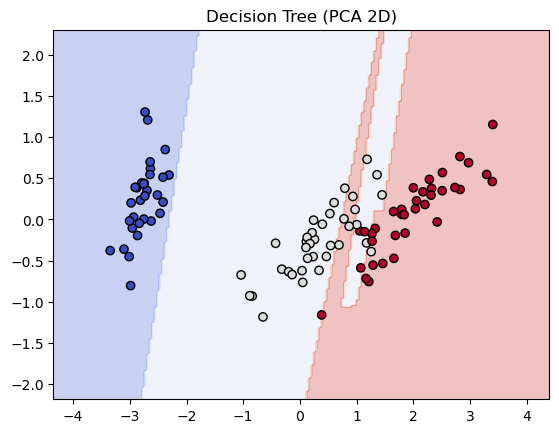

In [ ]:
def predict_tree_grid(X_grid):
    return predict_tree(tree, pca.inverse_transform(X_grid))

plot_decision_boundary(predict_tree_grid, X_train_2d, y_train, "Decision Tree (PCA 2D)")

### KNN

In [ ]:
y_pred_knn = predict_knn(X_train, y_train, X_test, k=3)
print("KNN Accuracy:", np.mean(y_pred_knn == y_test))

KNN Accuracy: 1.0


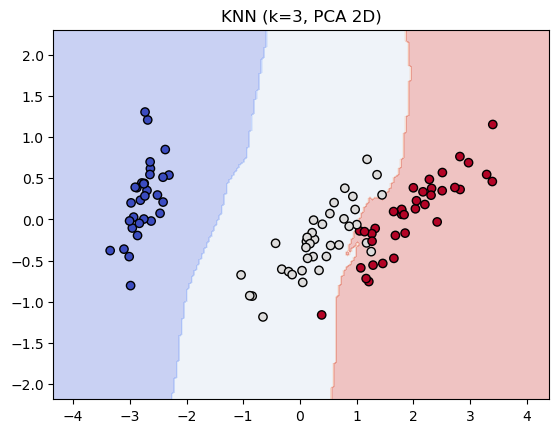

In [ ]:
def predict_knn_grid(X_grid):
    return predict_knn(X_train, y_train, pca.inverse_transform(X_grid), k=3)

plot_decision_boundary(predict_knn_grid, X_train_2d, y_train, "KNN (k=3, PCA 2D)")

### Naive Bayes

In [ ]:
priors, likelihoods = train_naive_bayes(X_train, y_train)
y_pred_nb = predict_naive_bayes(X_test, priors, likelihoods)

print("Naive Bayes Accuracy:", np.mean(y_pred_nb == y_test))

Naive Bayes Accuracy: 0.9777777777777777


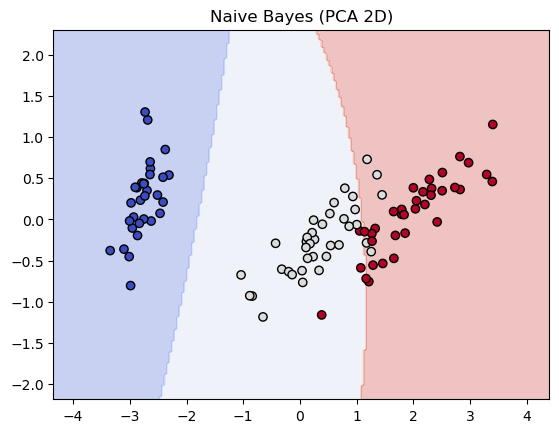

In [ ]:
def predict_nb_grid(X_grid):
    return predict_naive_bayes(pca.inverse_transform(X_grid), priors, likelihoods)

plot_decision_boundary(predict_nb_grid, X_train_2d, y_train, "Naive Bayes (PCA 2D)")

### Perceptron (Binary)

In [ ]:
# Filter only classes 0 and 1
mask = y_train < 2
X_train_bin, y_train_bin = X_train[mask], y_train[mask]
mask_test = y_test < 2
X_test_bin, y_test_bin = X_test[mask_test], y_test[mask_test]

w, b = train_perceptron(X_train_bin, y_train_bin, lr=0.01, epochs=1000)
y_pred_perc = predict_perceptron(X_test_bin, w, b)

print("Perceptron Accuracy (class 0 vs 1):", np.mean(y_pred_perc == y_test_bin))

Perceptron Accuracy (class 0 vs 1): 1.0


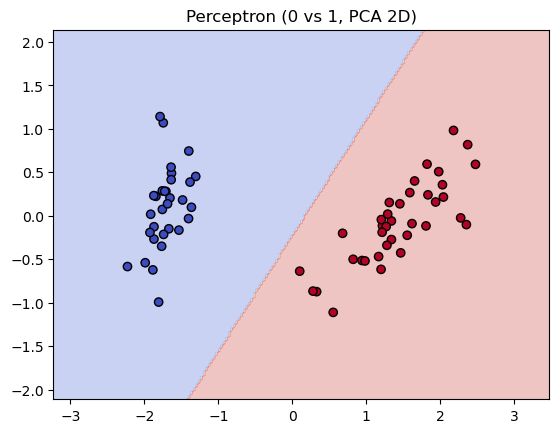

In [ ]:
X_train_bin_2d = pca.fit_transform(X_train_bin)
def predict_perc_grid(X_grid):
    return predict_perceptron(pca.inverse_transform(X_grid), w, b)

plot_decision_boundary(predict_perc_grid, X_train_bin_2d, y_train_bin, "Perceptron (0 vs 1, PCA 2D)")

### Comparison of Algorithms

             Algorithm  Accuracy
0  Logistic Regression  1.000000
1        Decision Tree  0.911111
2            KNN (k=5)  1.000000
3          Naive Bayes  0.977778
4  Perceptron (0 vs 1)  1.000000


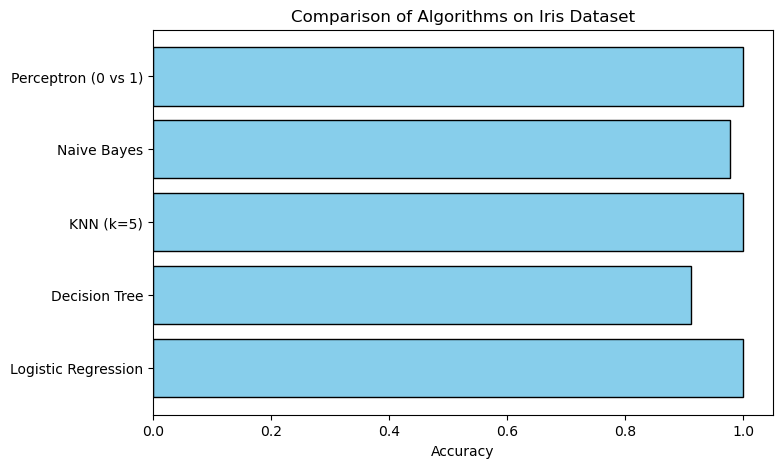

In [ ]:
results = {
    "Logistic Regression": np.mean(y_pred_lr == y_test),
    "Decision Tree": np.mean(y_pred_tree == y_test),
    "KNN (k=5)": np.mean(y_pred_knn == y_test),
    "Naive Bayes": np.mean(y_pred_nb == y_test),
    "Perceptron (0 vs 1)": np.mean(y_pred_perc == y_test_bin)  # binary only
}

df_results = pd.DataFrame(list(results.items()), columns=["Algorithm", "Accuracy"])
print(df_results)

plt.figure(figsize=(8, 5))
plt.barh(df_results["Algorithm"], df_results["Accuracy"], color="skyblue", edgecolor="black")
plt.xlabel("Accuracy")
plt.title("Comparison of Algorithms on Iris Dataset")
plt.xlim(0, 1.05)
plt.show()

## Wine Data

In [ ]:
wine = load_wine()
X = wine.data[:, [0, 9]]   # alcohol (0) and color_intensity (9)
y = wine.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print("Shape of X_train:", X_train.shape)
print("Classes:", np.unique(y))

Shape of X_train: (124, 2)
Classes: [0 1 2]


In [ ]:
def plot_decision_boundary(model_predict, X, y, title, resolution=0.02):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, resolution),
        np.arange(y_min, y_max, resolution)
    )
    grid = np.c_[xx.ravel(), yy.ravel()]

    Z = model_predict(grid).reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors="k", cmap=plt.cm.coolwarm)
    plt.xlabel("Alcohol")
    plt.ylabel("Color Intensity")
    plt.title(title)
    plt.show()

### Logistic Regression

In [ ]:
w_list, b_list, classes = train_logistic_regression_ovr(X_train, y_train, lr=0.1, epochs=3000)
y_pred_lr = predict_logistic_regression_ovr(X_test, w_list, b_list, classes)

print("Logistic Regression Accuracy:", np.mean(y_pred_lr == y_test))

Logistic Regression Accuracy: 0.5555555555555556


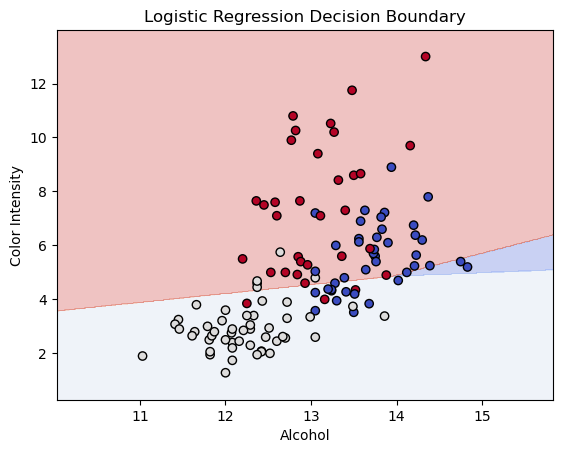

In [ ]:
plot_decision_boundary(
    lambda grid: predict_logistic_regression_ovr(grid, w_list, b_list, classes),
    X_train, y_train,
    "Logistic Regression Decision Boundary"
)

### Decision Tree

In [ ]:
tree = build_tree(X_train, y_train, max_depth=5)
y_pred_tree = predict_tree(tree, X_test)

print("Decision Tree Accuracy:", np.mean(y_pred_tree == y_test))
print("\nTree structure:")
print_tree(tree)

Decision Tree Accuracy: 0.7222222222222222

Tree structure:
[X1 <= 3.80]
  [X0 <= 12.99]
    Leaf: Class=1
    [X1 <= 3.38]
      Leaf: Class=1
      [X1 <= 3.58]
        Leaf: Class=0
        Leaf: Class=1
  [X0 <= 12.96]
    [X1 <= 4.68]
      [X0 <= 12.25]
        Leaf: Class=2
        [X0 <= 12.72]
          Leaf: Class=1
          Leaf: Class=2
      [X0 <= 12.64]
        [X0 <= 12.60]
          Leaf: Class=2
          Leaf: Class=1
        Leaf: Class=2
    [X1 <= 7.80]
      [X0 <= 13.16]
        [X0 <= 13.05]
          Leaf: Class=0
          Leaf: Class=2
        [X0 <= 13.88]
          Leaf: Class=0
          Leaf: Class=0
      [X0 <= 13.58]
        Leaf: Class=2
        [X0 <= 13.94]
          Leaf: Class=0
          Leaf: Class=2


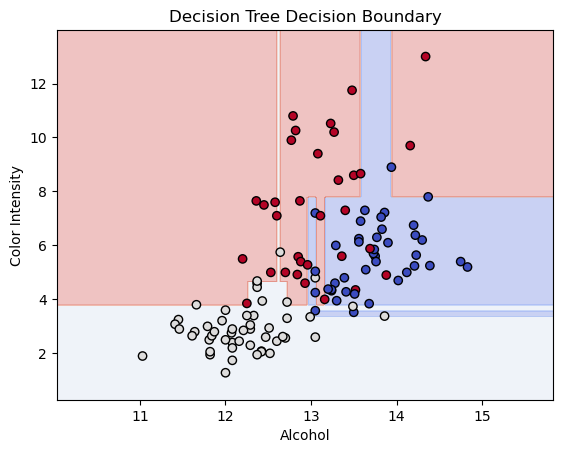

In [ ]:
plot_decision_boundary(
    lambda grid: predict_tree(tree, grid),
    X_train, y_train,
    "Decision Tree Decision Boundary"
)

### KNN

In [ ]:
y_pred_knn = predict_knn(X_train, y_train, X_test, k=5)
print("KNN Accuracy:", np.mean(y_pred_knn == y_test))

KNN Accuracy: 0.7777777777777778


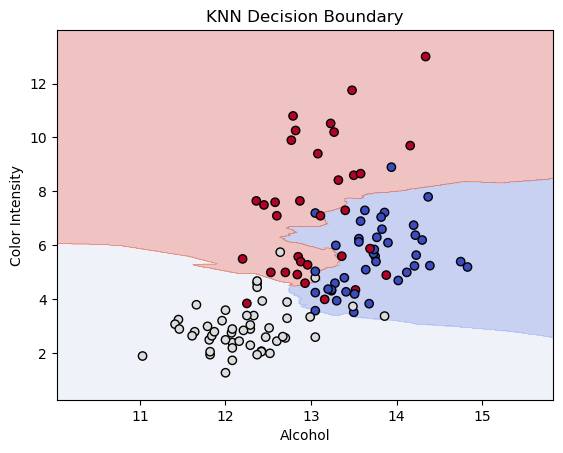

In [ ]:
plot_decision_boundary(
    lambda grid: predict_knn(X_train, y_train, grid, k=5),
    X_train, y_train,
    "KNN Decision Boundary"
)

### Naive Bayes

In [ ]:
priors, likelihoods = train_naive_bayes(X_train, y_train)
y_pred_nb = predict_naive_bayes(X_test, priors, likelihoods)
print("Naive Bayes Accuracy:", np.mean(y_pred_nb == y_test))

Naive Bayes Accuracy: 0.7592592592592593


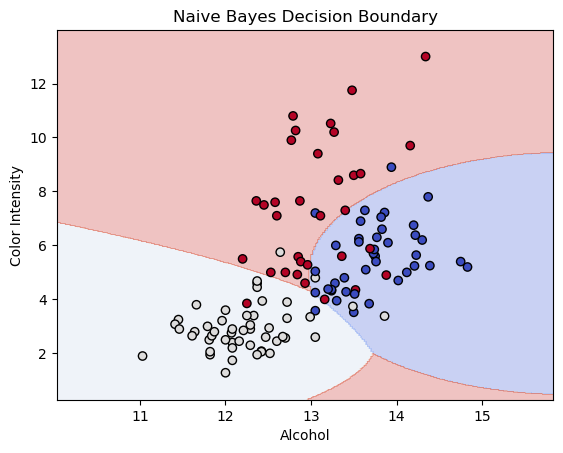

In [ ]:
plot_decision_boundary(
    lambda grid: predict_naive_bayes(grid, priors, likelihoods),
    X_train, y_train,
    "Naive Bayes Decision Boundary"
)

### Perceptron (Binary)

In [ ]:
mask = y_train < 2
X_train_bin, y_train_bin = X_train[mask], y_train[mask]
mask_test = y_test < 2
X_test_bin, y_test_bin = X_test[mask_test], y_test[mask_test]

w, b = train_perceptron(X_train_bin, y_train_bin, lr=0.01, epochs=1000)
y_pred_perc = predict_perceptron(X_test_bin, w, b)
print("Perceptron Accuracy (0 vs 1):", np.mean(y_pred_perc == y_test_bin))

Perceptron Accuracy (0 vs 1): 0.8205128205128205


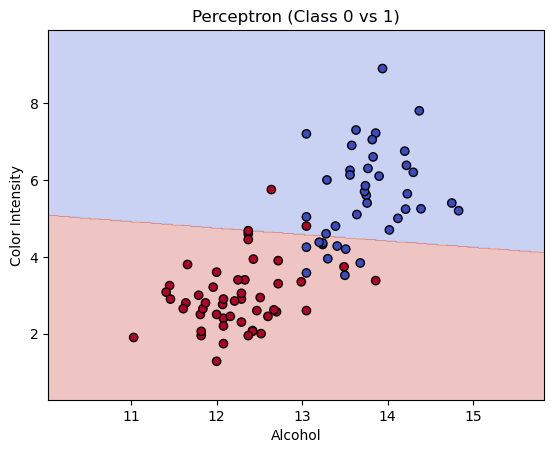

In [ ]:
plot_decision_boundary(
    lambda grid: predict_perceptron(grid, w, b),
    X_train_bin, y_train_bin,
    "Perceptron (Class 0 vs 1)"
)

### Comparison of Algorithms

             Algorithm  Accuracy
0  Logistic Regression  0.555556
1        Decision Tree  0.722222
2            KNN (k=5)  0.777778
3          Naive Bayes  0.759259
4  Perceptron (0 vs 1)  0.820513


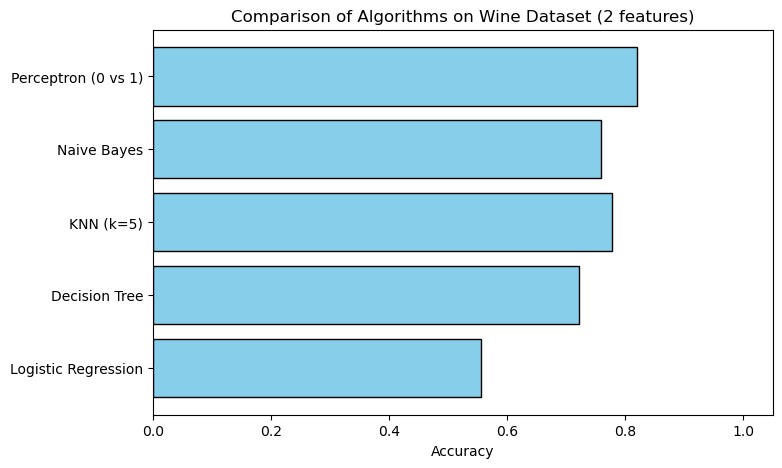

In [ ]:
results = {
    "Logistic Regression": np.mean(y_pred_lr == y_test),
    "Decision Tree": np.mean(y_pred_tree == y_test),
    "KNN (k=5)": np.mean(y_pred_knn == y_test),
    "Naive Bayes": np.mean(y_pred_nb == y_test),
    "Perceptron (0 vs 1)": np.mean(y_pred_perc == y_test_bin)  # binary only
}

df_results = pd.DataFrame(list(results.items()), columns=["Algorithm", "Accuracy"])
print(df_results)

plt.figure(figsize=(8, 5))
plt.barh(df_results["Algorithm"], df_results["Accuracy"], color="skyblue", edgecolor="black")
plt.xlabel("Accuracy")
plt.title("Comparison of Algorithms on Wine Dataset (2 features)")
plt.xlim(0, 1.05)
plt.show()